In [4]:
import pandas as pd
import konlpy
from konlpy.tag import Komoran
from pprint import pprint
from collections import defaultdict
from collections import Counter
komoran=Komoran()
#print(konlpy.__version__)



##사용자 사전 추가하기
komoran_userdic=Komoran(userdic='./userdicCanSur.txt')
# 형태소분석 결과 보기 komoran.pos(sent)
Data=pd.read_csv('C:/Users/user/Desktop/9.21(월)/현대 자료/현대차 2020-9-21  11시 1분 22초 merging.csv', engine='python', encoding='CP949')
corpus=Data['title']
SW = [".co",".kr","기자","뉴스",". co", ". com", ".com",
      "채널","구독","네이버","대상", "무단", "전재", "재배포","금지"]



import nltk #nltk라이브러리를 활용하면 토큰데이터를 살펴볼 수 있다고 함 
total_tokens=[token for msg in corpus for token in str(msg).split()]
print(len(total_tokens)) #전체 토큰의 갯수 

text=nltk.Text(total_tokens, name='NMSC') 
#nltk.Text는 토큰데이터를 묶을수 있게 해주나봄
#NMSC는 텍스트객체에 붇이 이름이라고 니옴, <Text:NMSC>라고 나옴  
print(len(set(text.tokens))) #중복을제거한 토큰의 갯수 
print(text.vocab().most_common(10)) #가장 많이 나온 상위 10개의 토큰 
#print(text.vocab().most_common()[:-20:-1]) #하위10개의 토큰 구하기 

import re
def message_cleaning(docs):
    docs = [str(doc) for doc in docs] # series의 object를 str로 변경.
    #사진이나 이모티콘제거 
    pattern1 = re.compile("Photo|Emoticon")
    docs = [pattern1.sub("", doc) for doc in docs]
    
    # 자음이나 모음만 존재하는 표현 제거, 예: ㅠㅠ, ㅋㅋㅋ
    pattern2 = re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*") 
    docs = [pattern2.sub("", doc) for doc in docs]
    
    # http://로 시작하는 하이퍼링크 제거 
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("", doc) for doc in docs]
    
    # 특수문제 제거 
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]

    return docs

def text_tokenizing(doc):
    # morph만 
    # return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    return [word for word in komoran_userdic.nouns(doc) if word not in SW and len(word) > 1]


cleaned_corpus = message_cleaning(corpus)
print(len(cleaned_corpus))
#print(cleaned_corpus[:2])

#cleaned_corpus는 현재 list형임
cleaned_text = pd.Series(cleaned_corpus) #대괄호안에 ''와 ,로 구분되어 있던 각 글을 pd.series로 바꾼?
cleaned_data = cleaned_text[cleaned_text != ""] #빈칸이 없는 값을 cleaned_data로 저장? 
#cleaned_data.info() #이건 에러나는데 cleaned_data가 시리즈형이라 그런듯
#cleaned_data.head()


import pickle #피클모듈을 활용해 객체자체를 바이너리로 저장하게 
with open("./cleaned_data.pk", "wb") as f: #cleaned_data파일을 피클로 저장?
    pickle.dump(cleaned_data, f) #피클.덤프(객체, 파일)로 저장하는거임 

#!pip install tqdm
from tqdm import tqdm_notebook # progress bar
#from konlpy.tag import Mecab #Mecab, Okt 등 형태소 분석기 불러오기,앞에서 코모란불러옴 
import numpy as np
import string # 특수문자
import warnings # 경고 알림 제거
from gensim import corpora
from gensim import models
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore", category=DeprecationWarning) # 경고 알림이 뜨면 모두 무시합니다.

def read_documents(input_file_name):
    """문서들을 주어진 이름의 파일로부터 읽어들여 돌려준다."""
    corpus = []
    with open(input_file_name, 'rb') as f:
        temp_corpus = pickle.load(f)
    for page in temp_corpus:
        corpus += page
    return corpus

def text_cleaning(docs): # 한글만 남기는 함수 
    for doc in docs:
        doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
    return docs

def text_tokenizing(corpus, tokenizer):
    token_corpus = []
    if tokenizer == "noun":
        for n in tqdm_notebook(range(len(corpus)), desc="Preprocessing"):
            token_text = komoran_userdic.nouns(corpus[n])
            token_text = [word for word in token_text if word not in SW and len(word) > 1]
            token_corpus.append(token_text)
            
    elif tokenized == "morph":
        for n in tqdm_notebook(range(len(corpus)), desc="Preprocessing"):
            token_text = komoran_userdic.nouns(corpus[n])
            token_text = [word for word in token_text if word not in SW and len(word) > 1]
            token_corpus.append(token_text)

    elif tokenizer == "word":
        for n in tqdm_notebook(range(len(corpus)), desc="Preprocessing"):
            token_text = corpus[n].split()
            token_text = [word for word in token_text if word not in SW and len(word) > 1]
            token_corpus.append(token_text)
        
    return token_corpus


documents = corpus
#SW = define_stopwords("./stopwords-ko.txt")
cleaned_text = text_cleaning(documents)
tokenized_text = text_tokenizing(cleaned_text, tokenizer="noun") #tokenizer= "noun" or "word"

#print(tokenized_text[11])


def flatten(l):
    flatList=[]
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

14164
2106
[('현대차,', 874), ('현대차', 603), ('첫', 188), ('수출', 169), ('수소연료전지', 158), ('사업', 111), ('사전계약', 111), ('서비스', 104), ('디지털키', 102), ('전시장', 101)]
2000


In [8]:
cleaned_nouns=flatten(tokenized_text) #모두 토크나이징된 단어를 flatten하게 
#즉, flatten전에는 각 문장이 []로 또 []안에 있었는데, 플래튼하면 하나의 []로 되었음 
cleaned_nouns=[x for x in cleaned_nouns if len(x)>1] #한글자단어 초과
cleaned_nouns=[x for x in cleaned_nouns if not x in SW] #stop_words에 없는 단어
cleaned_nouns=[x for x in cleaned_nouns if not x.isdigit()] #숫자가 아닌단어 
# 상위 60개 단어 frequency 뽑기 
pd.Series(cleaned_nouns).value_counts().head(60) #상위60개 보여주기 

현대차     1988
수소       426
수출       221
연료전지     205
사업       184
전시장      153
디지털      146
현대건설     145
공항       133
사전       131
인천       129
계약       127
서비스      122
시스템      121
자동차      121
송파대로     117
항공       113
울산       111
도심       109
모빌리티     108
디자인      102
교통        99
신형        96
플랫폼       95
공장        95
돌파        90
첫날        89
확진        89
부문        87
로봇        84
친환경       83
공개        82
금상        82
웨어        76
러브        76
수상        75
유럽        72
기반        72
체험        68
벡스        68
대리        68
협력        68
개시        67
한국        67
추진        66
개소        66
출시        64
기차        58
삼성        58
코로나       58
운전        56
미래        55
세계        54
확장        54
정의선       53
야간        53
운영        51
스마트       51
세대        50
만원        50
dtype: int64

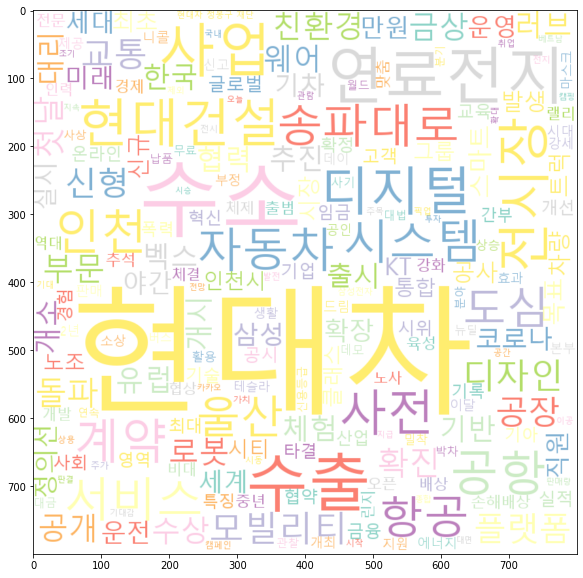

In [10]:
#!pip install wordcloud
from wordcloud import WordCloud
def __array__(self):
    """Convert to numpy array.
    Returns 
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()
def to_array(self):
    return np.array(self.to_image())
font_path = 'C:/Windows/Fonts/malgun.ttf'
#리눅스용 font_path="/Library/Fonts/AppleGothic.ttf"
wordcloud=WordCloud(font_path=font_path, width=800, height=800, 
                    background_color="white", colormap="Set3")
wordcloud=wordcloud.generate_from_frequencies(Counter(cleaned_nouns))
array=wordcloud.to_array()
fig=plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.show()

In [16]:
dictionary = corpora.Dictionary(tokenized_text)
# 문서-단어 행렬(document-term matrix) 생성
corpus = [dictionary.doc2bow(text) for text in tokenized_text]


import time
import numpy as np
import json
import warnings
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
coherences=[]
perplexities=[]
passes=[]
warnings.filterwarnings('ignore')

from gensim.models.word2vec import Word2Vec
embedding_model = Word2Vec(tokenized_text, size=100, window = 5, 
                           min_count=50, workers=4, iter=100, sg=1)
#포스태깅된 컨텐츠를 100차원의 벡터로 바꾸고, 주변 단어(window)는 앞뒤로 5개까지 보되, 
#코퍼스 내 출현 빈도가 50번 미만인 단어는 분석에서 제외해라. CPU는 쿼드코어를 쓰고 100번 반복 학습해라. 
#분석방법론은 CBOW와 Skip-Gram 중 후자를 선택해라

In [18]:
print(embedding_model.most_similar(positive=["현대차"], topn=20))

[('출시', 0.4253120720386505), ('확장', 0.33724820613861084), ('디자인', 0.32688063383102417), ('운영', 0.3250434994697571), ('코로나', 0.3199760913848877), ('수상', 0.3141026496887207), ('개시', 0.2958371937274933), ('세대', 0.26300811767578125), ('추진', 0.2606297731399536), ('미래', 0.2538595497608185), ('서비스', 0.24923446774482727), ('공장', 0.24248580634593964), ('울산', 0.24017508327960968), ('한국', 0.2362643927335739), ('공개', 0.23010048270225525), ('사업', 0.229050412774086), ('계약', 0.22873574495315552), ('운전', 0.2262907475233078), ('전시장', 0.22408637404441833), ('신형', 0.22348621487617493)]


** degree **
('현대차', 0.9750000000000001)
('사업', 0.15000000000000002)
('수소', 0.1125)
('현대건설', 0.08125)
('인천', 0.08125)
('공항', 0.07500000000000001)
('울산', 0.07500000000000001)
('수출', 0.06875)
('서비스', 0.06875)
('항공', 0.06875)
('도심', 0.06875)
('한국', 0.06875)
('연료전지', 0.0625)
('디지털', 0.0625)
('공사', 0.0625)
('사전', 0.05625)
('계약', 0.05625)
('전시장', 0.05625)
('송파대로', 0.05625)
('자동차', 0.05625)
** betweenness **
('현대차', 0.9185966981132075)
('온라인', 0.012264150943396225)
('사업', 0.006631850853548967)
('수소', 0.0038497678945792154)
('울산', 0.0011923480083857441)
('모빌리티', 0.0009171907756813417)
('서비스', 0.0007193396226415095)
('인천', 0.0005461964660077867)
('친환경', 0.0004716981132075472)
('디지털', 0.000365566037735849)
('현대건설', 0.00034965558550464204)
('전시장', 0.00032101677148846955)
('송파대로', 0.00032101677148846955)
('수출', 0.00027272386942198265)
('정의선', 0.0002358490566037736)
('사전', 0.00021226415094339617)
('계약', 0.00021226415094339617)
('최초', 0.00019654088050314464)
('공개', 0.0001729559748427673)
('신형', 0.00

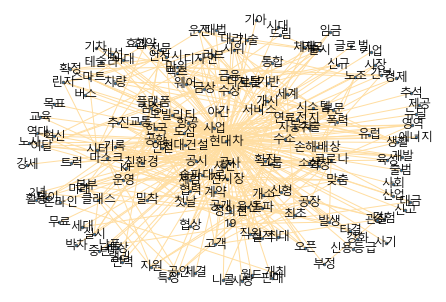

In [28]:
#########잡아라 텍스트 마이닝 with파이선 책 129p
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w]+")

#아래 stop_words를 수정해가면서 진행 

count={}
for line in Data['title']:
    #words=line.lower()
    tokens=komoran_userdic.nouns(line) #komoran_userdic.nouns대신에 tokenizer.tokenize였음 
    stopped_tokens=[i for i in list(set(tokens)) if not i in SW+["br"]]
    stopped_tokens2=[i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b:
                count[b, a]=count.get((b, a),0)+1
            else :
                count[a, b]=count.get((a, b),0)+1
df=pd.DataFrame.from_dict(count, orient='index')

list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])


df2=pd.DataFrame(list1,columns=["term1","term2","freq"])
df3=df2.sort_values(by=["freq"],ascending=False)
df3_pos=df3.reset_index(drop=True)
df3_pos.head()



import networkx as nx
import operator

import numpy as np
G_pos=nx.Graph()

for i in range((len(np.where(df3_pos['freq']>15)[0]))):
    G_pos.add_edge(df3_pos['term1'][i], df3_pos['term2'][i], weight=int(df3_pos['freq'][i]))

dgr = nx.degree_centrality(G_pos)
btw = nx.betweenness_centrality(G_pos)
cls = nx.closeness_centrality(G_pos)
egv = nx.eigenvector_centrality(G_pos)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(20):
    print(sorted_dgr[x])

print("** betweenness **")
for x in range(20):
    print(sorted_btw[x])

print("** closeness **")
for x in range(20):
    print(sorted_cls[x])

print("** eigenvector **")
for x in range(20):
    print(sorted_egv[x])

G = nx.Graph()

for i in range(len(sorted_cls)):
    G.add_node(sorted_cls[i][0], nodesize=sorted_dgr[i][1])

for i in range((len(np.where(df3_pos['freq']>15)[0]))): #원래 15였는데 50으로 
    G.add_weighted_edges_from([(df3_pos['term1'][i], df3_pos['term2'][i],int(df3_pos['freq'][i]))])

# sizes = [G.node[node]['nodesize']*500 for node in G]



%matplotlib inline
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
matplotlib.font_manager._rebuild()

font_name = font_manager.FontProperties(fname=font_path).get_name()
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
    'font_family': font_name,
}

nx.draw(G, node_size=6, pos=nx.spring_layout(G, k=2.5, iterations=50), **options) ##node_size나 레이아웃, k 수정함
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

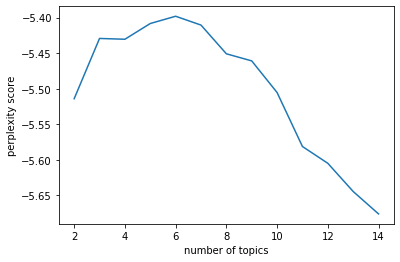

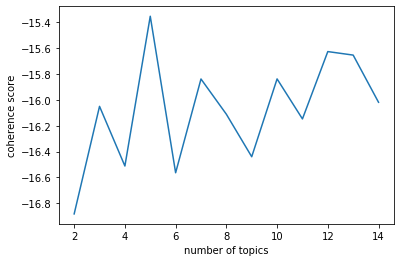

Building document-term matrix.

Printing topic words.

Topic ID: 0
	현대차	0.15443603694438934
	수소	0.036329612135887146
	수출	0.018672505393624306
	연료전지	0.017471395432949066
	전시장	0.013329291716217995
	시스템	0.010568076744675636
	자동차	0.010112179443240166
	송파대로	0.00944360438734293
	디지털	0.00923785101622343
	울산	0.009043929167091846
	현대건설	0.008946527726948261
	공항	0.00860696192830801
	사업	0.008555714972317219
	사전	0.007553803734481335
	부문	0.007510873023420572
	플랫폼	0.007485785521566868
	친환경	0.007337913848459721
	계약	0.006992257200181484
	공장	0.006986693944782019
	모빌리티	0.006812380626797676
	신형	0.006806301884353161
	확진	0.006565523333847523
	도심	0.006427545566111803
	교통	0.0062538147903978825
	유럽	0.006184575147926807
	인천	0.006126890890300274
	항공	0.005980214569717646
	서비스	0.005913401488214731
	체험	0.005884543526917696
	개시	0.00577326025813818


Topic ID: 1
	현대차	0.09472648054361343
	사업	0.024400027468800545
	로봇	0.017119871452450752
	인천	0.016838669776916504
	디자인	0.01671299710869789
	금상	0.0156378373503685
	서비스	0.01

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.043979  0.0       1        1  64.924316
1     -0.043979  0.0       2        1  35.075687, topic_info=    Category        Freq        Term        Total  loglift  logprob
149  Default   96.000000          로봇    96.000000  30.0000  30.0000
46   Default  191.000000          사업   191.000000  29.0000  29.0000
147  Default   92.000000          금상    92.000000  28.0000  28.0000
148  Default   86.000000          러브    86.000000  27.0000  27.0000
152  Default  111.000000         디자인   111.000000  26.0000  26.0000
150  Default   77.000000          벡스    77.000000  25.0000  25.0000
151  Default   84.000000          웨어    84.000000  24.0000  24.0000
18   Default  133.000000          인천   133.000000  23.0000  23.0000
344  Default  126.000000         서비스   126.000000  22.0000  22.0000
153  Default   80.000000          수상    80.000000  21.0000  21.0000
12   Default  114.000000          항공   114.000000  20.0000  20.0000
102  Default   92.000000          첫날    92.000000  19.0000  19.0000
99   Default  128.000000          계약   128.000000  18.0000  18.0000
47   Default   72.000000          협력    72.000000  17.0000  17.0000
182  Default   48.000000          공사    48.000000  16.0000  16.0000
101  Default  130.000000          사전   130.000000  15.0000  15.0000
11   Default   69.000000          한국    69.000000  14.0000  14.0000
404  Default   28.000000        손해배상    28.000000  13.0000  13.0000
20   Default  142.000000        현대건설   142.000000  12.0000  12.0000
5    Default  108.000000          도심   108.000000  11.0000  11.0000
100  Default   90.000000          돌파    90.000000  10.0000  10.0000
27   Default   65.000000          출시    65.000000   9.0000   9.0000
188  Default  142.000000         디지털   142.000000   8.0000   8.0000
402  Default   27.000000          간부    27.000000   7.0000   7.0000
405  Default   31.000000          폭력    31.000000   6.0000   6.0000
403  Default   40.000000          노조    40.000000   5.0000   5.0000
133  Default   55.000000          세계    55.000000   4.0000   4.0000
103  Default   50.000000          KT    50.000000   3.0000   3.0000
95   Default   36.000000          시위    36.000000   2.0000   2.0000
17   Default  128.000000          공항   128.000000   1.0000   1.0000
..       ...         ...         ...          ...      ...      ...
254   Topic2    9.664692          쾌거    13.064522   0.7462  -6.1975
501   Topic2   12.557160  현대차 정몽구 재단    17.316704   0.7263  -5.9357
46    Topic2  115.907532          사업   191.135406   0.5475  -3.7132
47    Topic2   46.474621          협력    72.297073   0.6058  -4.6271
499   Topic2   13.833016          데모    19.390198   0.7100  -5.8389
18    Topic2   79.988785          인천   133.860733   0.5327  -4.0841
344   Topic2   74.195297         서비스   126.190094   0.5166  -4.1593
102   Topic2   54.084000          첫날    92.266609   0.5135  -4.4754
95    Topic2   23.952696          시위    36.789337   0.6185  -5.2899
403   Topic2   25.799276          노조    40.717545   0.5913  -5.2156
11    Topic2   40.945019          한국    69.742752   0.5151  -4.7537
12    Topic2   62.398605          항공   114.980865   0.4364  -4.3324
99    Topic2   66.520233          계약   128.001083   0.3931  -4.2685
101   Topic2   64.226326          사전   130.644684   0.3376  -4.3036
27    Topic2   36.052097          출시    65.705360   0.4474  -4.8810
103   Topic2   28.928907          KT    50.075287   0.4990  -5.1011
2     Topic2  449.979492         현대차  1807.890015  -0.3431  -2.3568
5     Topic2   51.834831          도심   108.350342   0.3104  -4.5179
20    Topic2   63.499146        현대건설   142.163330   0.2417  -4.3149
100   Topic2   44.567776          돌파    90.156586   0.3431  -4.6690
188   Topic2   61.002796         디지털   142.228500   0.2011  -4.3550
133   Topic2   31.136469          세계    55.792229   0.4644  -5.0276
17    Topic2   53.232624          공항   128.911102   0.1632  -4.4913
214   Topic2   45.706

In [29]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,15):
    model = models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, alpha="auto", eta="auto", random_state=99)
    perplexity_values.append(model.log_perplexity(corpus))

x=range(2,15)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()


import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400)
    #ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    #ldamodel = models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, random_state=99)
    #coherence_model_lda=CoherenceModel(model=ldamodel, texts=corpus, dictionary=dictionary, topn=10)
    coherence_model_lda=CoherenceModel(model=ldamodel, corpus=corpus, coherence='u_mass')
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
    
x=range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()


# 위의 결과를 바탕으로 토픽 개수, 키워드 개수를 정해주는 변수를 추가.
NUM_TOPICS = 2
NUM_TOPIC_WORDS = 30

def build_doc_term_mat(documents):
    # 문서-단어 행렬 만들어주는 함수.
    print("Building document-term matrix.")
    dictionary = corpora.Dictionary(documents)
    corpus = [dictionary.doc2bow(document) for document in documents]
    return corpus, dictionary

def print_topic_words(model):
    # 토픽 모델링 결과를 출력해 주는 함수.
    print("\nPrinting topic words.\n")
    for topic_id in range(model.num_topics):
        topic_word_probs = model.show_topic(topic_id, NUM_TOPIC_WORDS)
        print("Topic ID: {}".format(topic_id))
        for topic_word, prob in topic_word_probs:
            print("\t{}\t{}".format(topic_word, prob))
        print("\n")

# document-term matrix를 만들고,
corpus, dictionary = build_doc_term_mat(tokenized_text)
# LDA를 실행.
model = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, 
                                 id2word=dictionary, alpha="auto", eta="auto", random_state=99)
# 결과를 출력.
print_topic_words(model)
print(model.log_perplexity(corpus))


# pyLDAvis 불러오기
import pyLDAvis
import pyLDAvis.gensim

# pyLDAvis를 jupyter notebook에서 실행할 수 있게 활성화.
pyLDAvis.enable_notebook()

# pyLDAvis 실행.
data = pyLDAvis.gensim.prepare(model, corpus, dictionary)
data